In [1]:
import pandas as pd
import airportsdata
import matplotlib
import matplotlib.pyplot as plt
import json
from mpl_toolkits.basemap import Basemap
import matplotlib.colors as colors
import numpy as np

In [12]:
# Load data
flights = pd.read_csv('data/flights', sep='\t')
flights

,Starting,Connection,End
0,YTZ,NaN,BOS
1,LHR,NaN,BOS
2,LHR,NaN,BOS
3,LHR,NaN,BOS
4,BHM,ATL,PVD
5,SFO,DTW,PVD
6,LHR,NaN,BOS
7,AUS,ATL,PVD
8,SFO,NaN,BOS
9,RAP,ORD,PVD


In [4]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
np.set_printoptions(suppress=True)

In [5]:
# Prepare airports
airports = airportsdata.load('IATA')  # key is the ICAO identifier (the default)

In [6]:
# Get information all together

journeys = []
lat = []
long = []
starts = flights['Starting']
connection = flights['Connection']
ends = flights['End']

for i in range(len(starts)):
    lat.append(airports[starts[i]]['lat'])
    long.append(airports[starts[i]]['lon'])
    
    if not pd.isnull(connection[i]):
        lat.append(airports[connection[i]]['lat'])
        long.append(airports[connection[i]]['lon'])
    
    lat.append(airports[ends[i]]['lat'])
    long.append(airports[ends[i]]['lon'])
    
    journeys.append([lat,long])
    lat = []
    long = []

In [7]:
journeys

[[[43.6275, 42.36294], [-79.3962, -71.00639]],
 [[51.4706, 42.36294], [-0.46194, -71.00639]],
 [[51.4706, 42.36294], [-0.46194, -71.00639]],
 [[51.4706, 42.36294], [-0.46194, -71.00639]],
 [[33.56389, 33.6367, 41.72233], [-86.75231, -84.42786, -71.42772]],
 [[37.61881, 42.21244, 41.72233], [-122.37542, -83.35339, -71.42772]],
 [[51.4706, 42.36294], [-0.46194, -71.00639]],
 [[30.19453, 33.6367, 41.72233], [-97.66988, -84.42786, -71.42772]],
 [[37.61881, 42.36294], [-122.37542, -71.00639]],
 [[44.04533, 41.97694, 41.72233], [-103.05736, -87.90815, -71.42772]],
 [[51.4706, 42.36294], [-0.46194, -71.00639]]]

In [11]:
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

cmap = plt.get_cmap('plasma')
new_cmap = truncate_colormap(cmap, 0.4, 0.9)

[-79.3962, -71.00639] [43.6275, 42.36294]
[-0.46194, -71.00639] [51.4706, 42.36294]
[-0.46194, -71.00639] [51.4706, 42.36294]
[-0.46194, -71.00639] [51.4706, 42.36294]
[-86.75231, -84.42786] [33.56389, 33.6367]
[-84.42786, -71.42772] [33.6367, 41.72233]
[-122.37542, -83.35339] [37.61881, 42.21244]
[-83.35339, -71.42772] [42.21244, 41.72233]
[-0.46194, -71.00639] [51.4706, 42.36294]
[-97.66988, -84.42786] [30.19453, 33.6367]
[-84.42786, -71.42772] [33.6367, 41.72233]
[-122.37542, -71.00639] [37.61881, 42.36294]
[-103.05736, -87.90815] [44.04533, 41.97694]
[-87.90815, -71.42772] [41.97694, 41.72233]
[-0.46194, -71.00639] [51.4706, 42.36294]


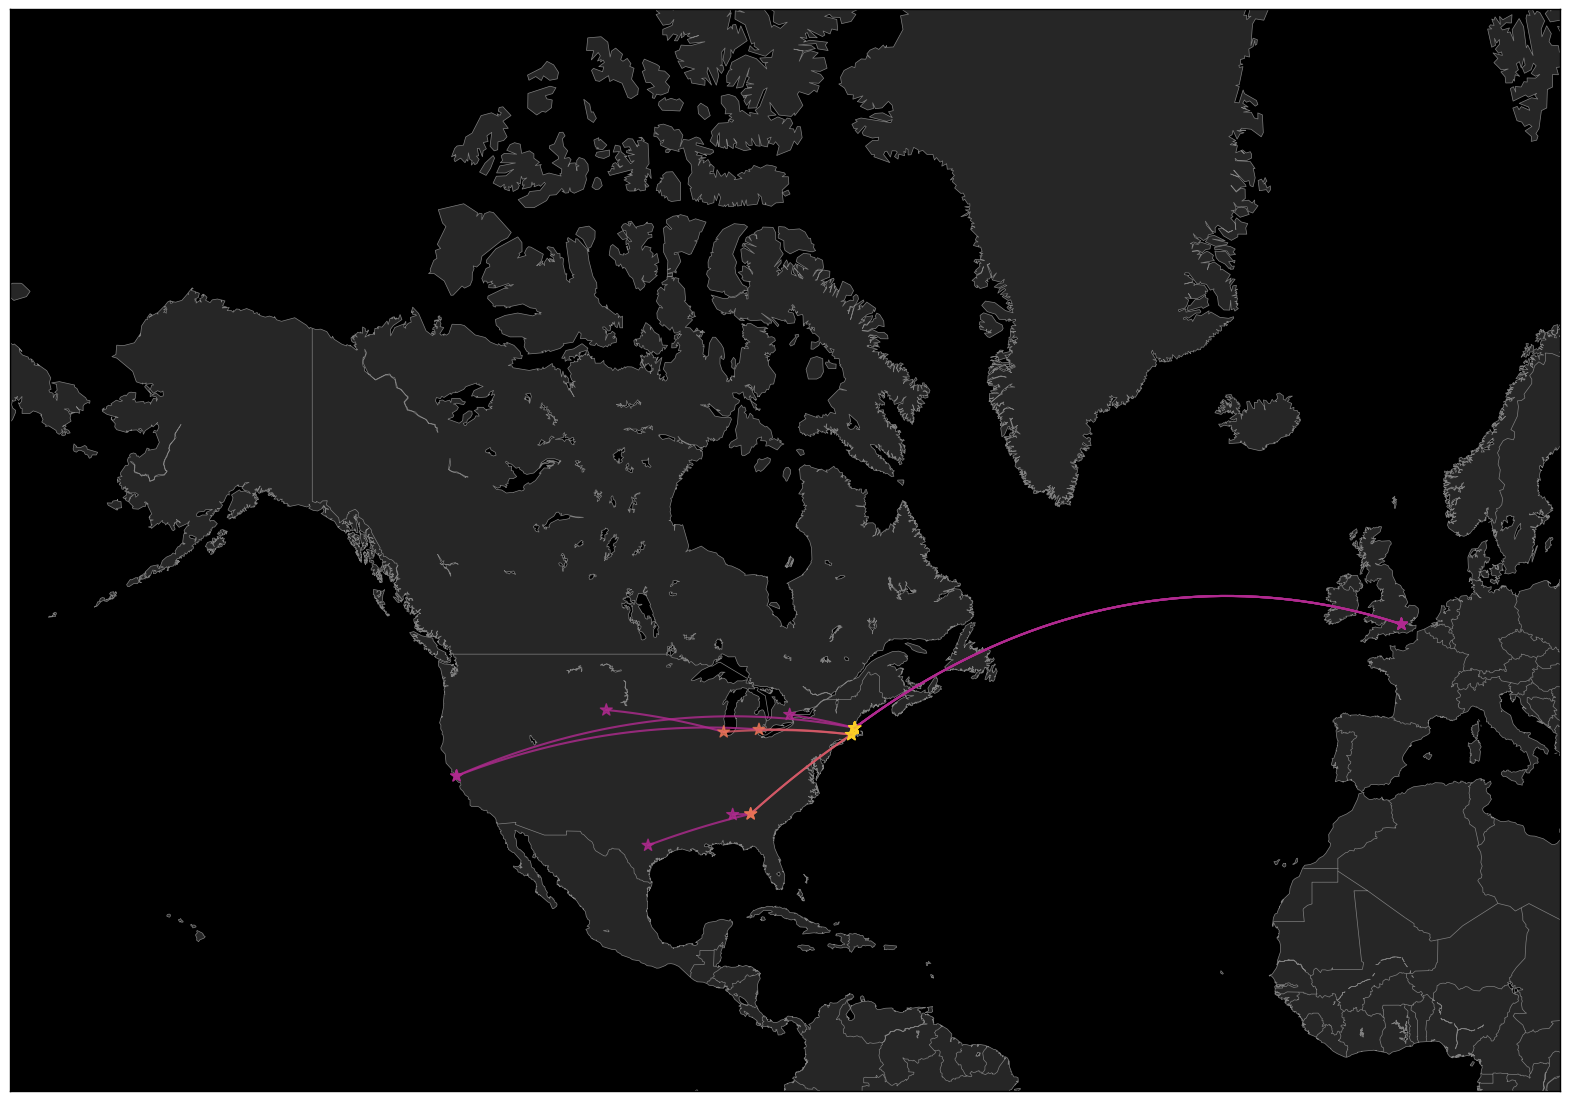

In [23]:
# Do the plotting

fig = plt.figure()

# basemap centered on New York
#m = Basemap(projection='merc',llcrnrlat=-80,urcrnrlat=80,
#            llcrnrlon=-180,urcrnrlon=180,lat_ts=20,
#            resolution='l')

m = Basemap(projection='merc',llcrnrlat=0,urcrnrlat=80,
            llcrnrlon=-180,urcrnrlon=20,lat_ts=20,
            resolution='l')


m.drawmapboundary(fill_color='black')
m.fillcontinents(color=[0.15,0.15,0.15],lake_color='black',zorder=1)
m.drawcoastlines(linewidth=0.5,color=[0.5,0.5,0.5])
m.drawcountries(linewidth=0.5,color=[0.5,0.5,0.5])

for long, lat in journeys:
    x,y = m(lat,long)

    for i in range(len(x)-1):
        col = new_cmap(i/len(x))
        x1 = [lat[i],lat[i+1]]
        y1 = [long[i],long[i+1]]
        print(x1, y1)
        m.drawgreatcircle(x1[0],y1[0],x1[1],y1[1],linewidth=1.5,color=col,alpha=0.8)
    
    plt.scatter(x, y, marker='*', c = range(len(x)), cmap=new_cmap,alpha=0.8,s=80,zorder=2)

fig.savefig('travel_map.png')